Лабораторная работа №3. 
Любыми известными способами осуществить построение импульсной и переходной характеристик,
амплитудно-частотной и фазочастотной характеристик КИХ- и БИХ-фильтров первого порядка.

Проанализировать изменение основных характеристик фильтров при изменении их параметров.

Осуществить обработку типовых последовательностей (единичный импульс, единичный скачок, синусоидальное колебание)
анализируемыми фильтрами. Сделать соответствующие выводы по полученным результатам.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

%matplotlib inline

Зная разностное уравнение можно найти импульсную характеристику фильтра: на вход подается единичный импульс (начальные условия нулевые)


 lfilter(b, a, x) моделируется процесс прохождения сигнала x через цифровой фильтр, с коэффициентами передаточной характеристики a и b.
 
 

# БИХ 

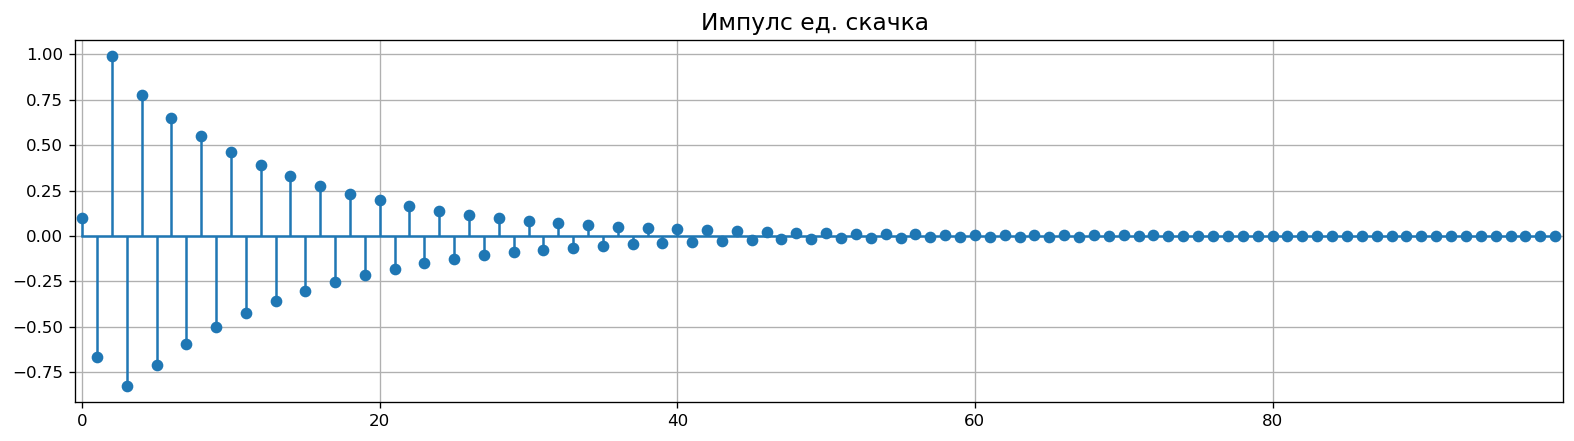

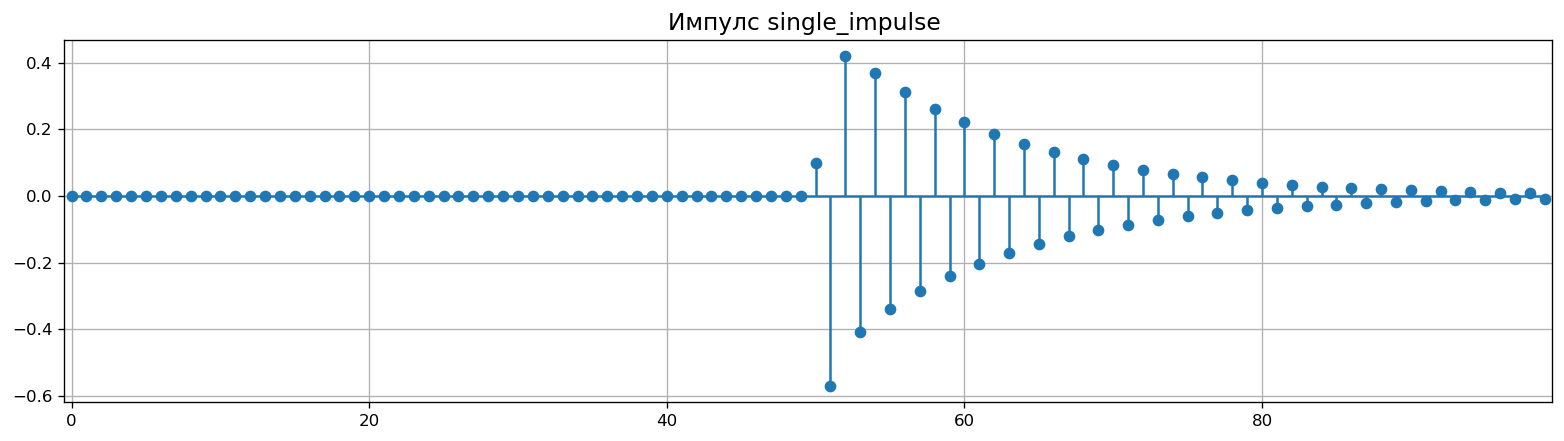

In [3]:
N = 100

b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] 
# / a0 + a1*z^(-1) + a2*z^(-2)

jump = np.zeros(N)
jump[0] = 1

single_impulse = np.zeros(N) 
for i in range(N//2,N):
    single_impulse[i] = 1
# print(single_impulse)

y1 = lfilter(b, a, jump)
y2 = lfilter(b, a, single_impulse)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Импулс ед. скачка ', fontsize=14)
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Импулс single_impulse ', fontsize=14)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

# plt.figure(figsize=(16, 4), dpi=120)
# plt.title('Frequency responce', fontsize=14)


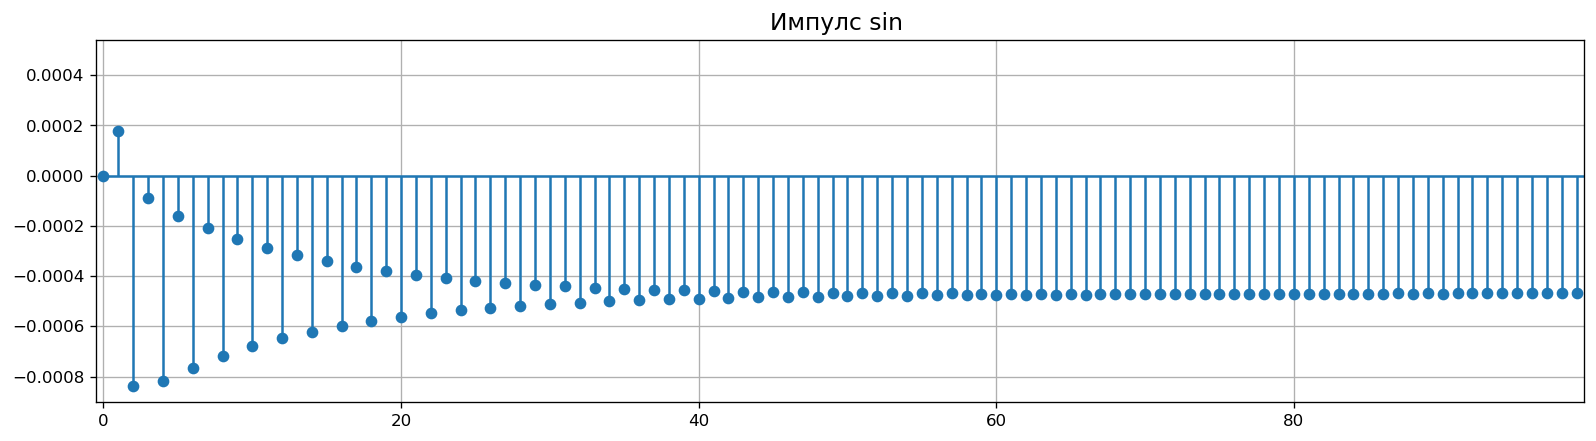

In [4]:
from matplotlib import pyplot as plt

sr = 4410
l = 3
fr = 5 
x = np.linspace(0, l, sr*l, endpoint=False)

sin_x = np.sin((2 * np.pi) * x * fr/4)
# plt.plot(y)
# plt.show()

# x_sin = y3[:3000]
# plt.plot(x_sin)
# plt.show()

y3 = lfilter(b, a, sin_x)
plt.figure(figsize=(16, 4), dpi=120)
plt.title('Импулс sin ', fontsize=14)
plt.stem(y3, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

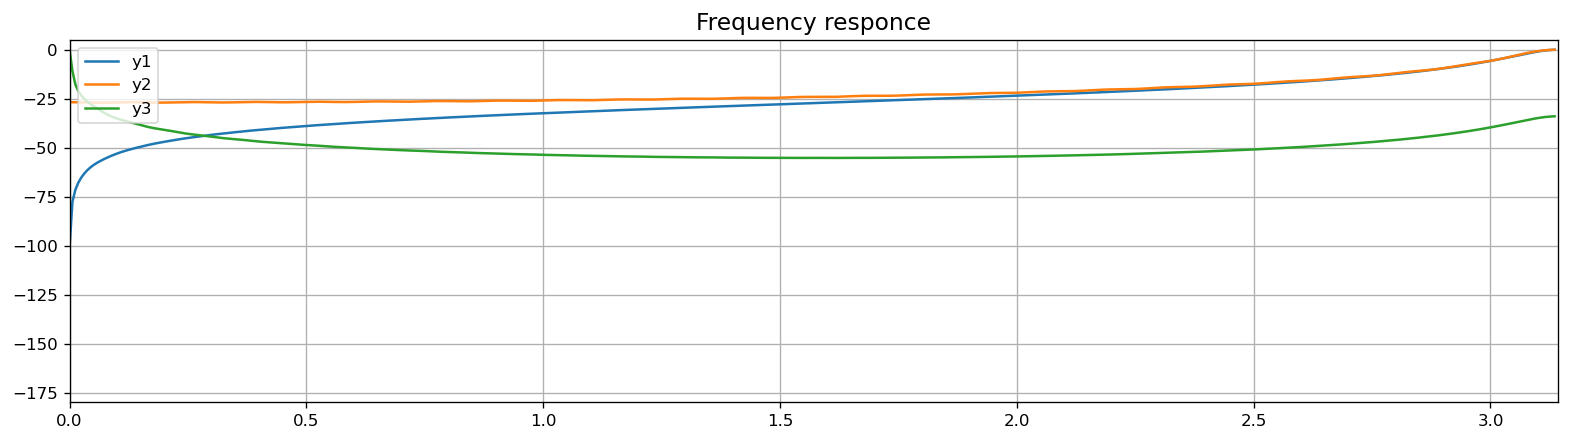

In [5]:
plt.figure(figsize=(16, 4), dpi=120)
plt.title('Frequency responce', fontsize=14)
for fir in (y1, y2, y3):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['y1', 'y2', 'y3'], loc ='upper left')
plt.grid(True)

# КИХ

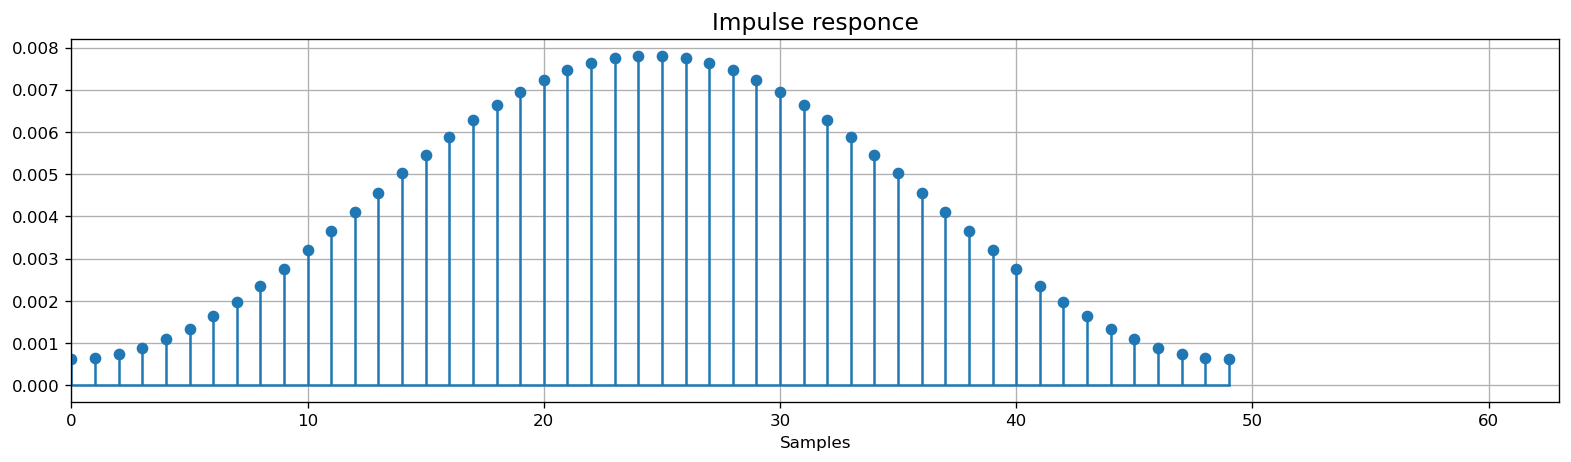

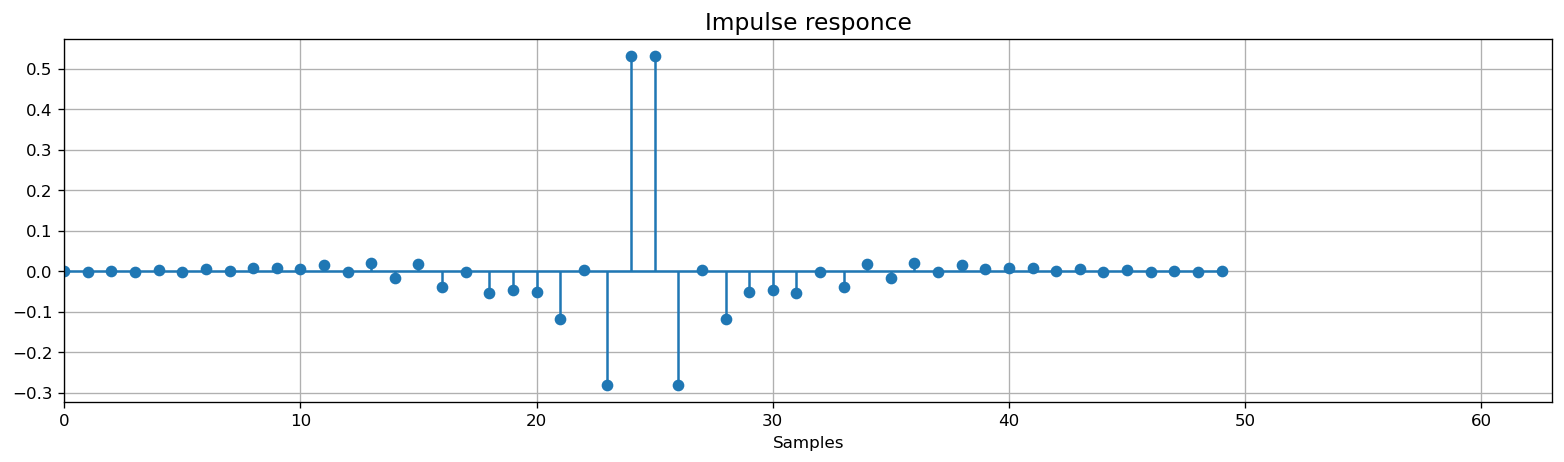

In [22]:
N = 100
lst_freqs = np.linspace(0, 1, N)

jump = np.zeros(N)
jump[0] = 1

single_impulse = np.zeros(N) 
for i in range(10,N-10):
    single_impulse[i] = 1
    
sr = 4410
l = 3
fr = 5 
x = np.linspace(0, l, sr*l, endpoint=False)

sin_x = np.sin((2 * np.pi) * x * fr/4)

NF = 50
# Расчет фильтра с применением оконной функции. 
# Задается набор нормированных частот и амплитуд на этих частотах

y =  firwin2(NF, lst_freqs, jump)
y2 = firwin2(NF, lst_freqs, single_impulse)
# y3 = firwin2(NF, lst_freqs, sin_x)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Impulse responce', fontsize=14)
plt.stem(y, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Impulse responce', fontsize=14)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)


# plt.figure(figsize=(16, 4), dpi=120)
# plt.title('Impulse responce', fontsize=14)
# plt.stem(y3, use_line_collection=True, basefmt='C0')
# plt.xlim([0, NFIR-1])
# plt.xlabel('Samples')
# plt.grid(True)


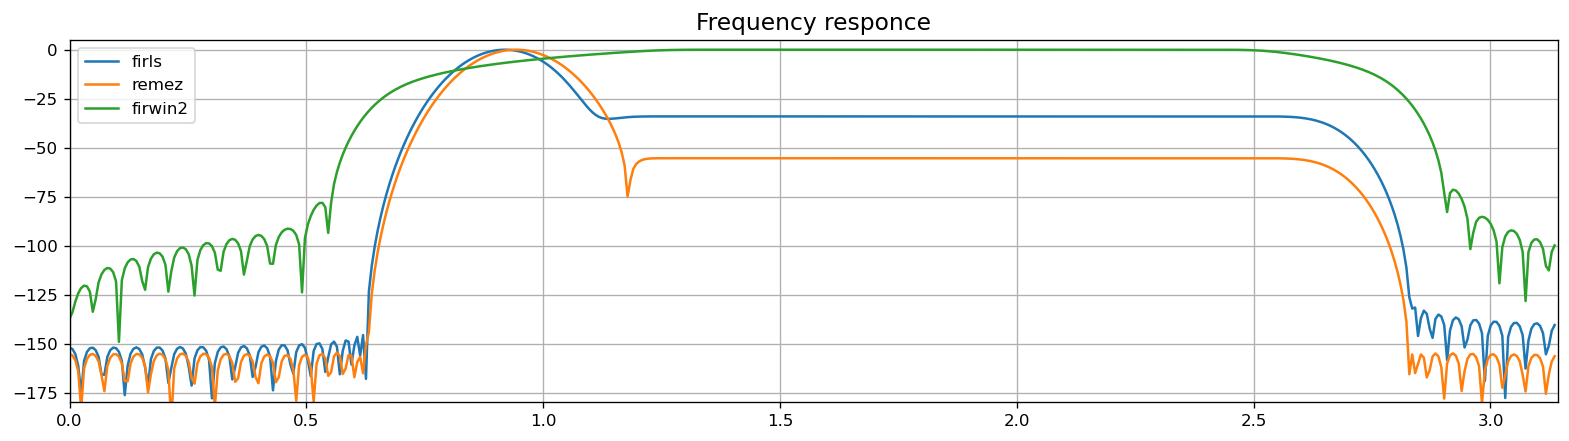

In [20]:
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

f_firls = firls(N, bands, desired, fs=fs)
f_remez = remez(N, bands, desired[::2], fs=fs)
f_firwin2 = firwin2(N, bands, desired, fs=fs)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Frequency responce', fontsize=14)
for f in (f_firls, f_remez, f_firwin2):
    freq, resp = freqz(f)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

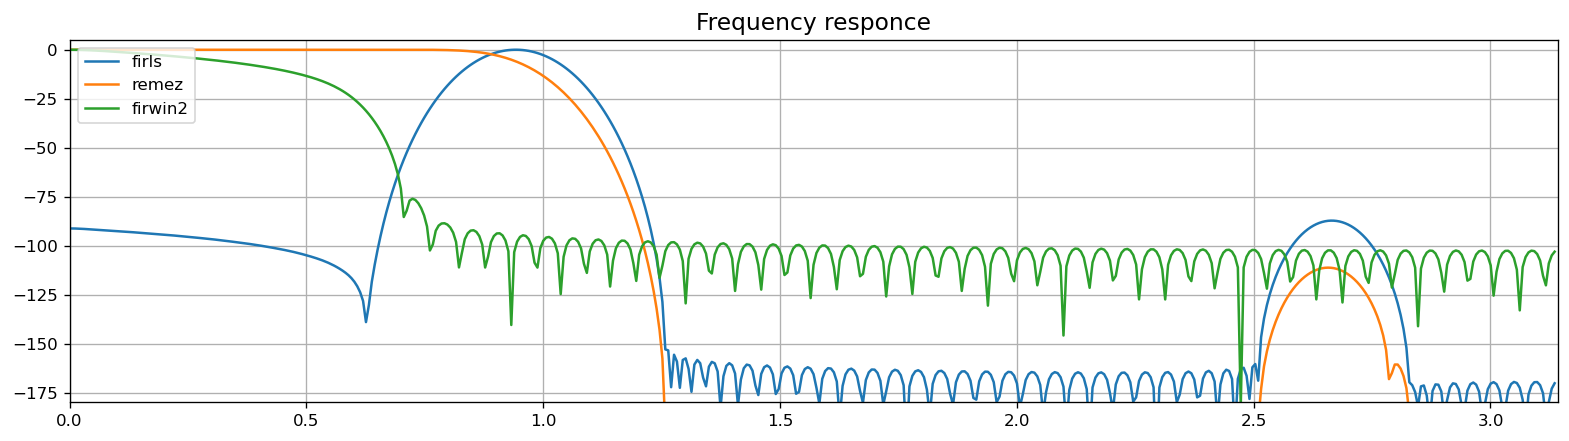

In [23]:
fs = 10
N = 117
desired = (1, 0, 0, 0, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

f_firls = firls(N, bands, desired, fs=fs)
f_remez = remez(N, bands, desired[::2], fs=fs)
f_firwin2 = firwin2(N, bands, desired, fs=fs)

plt.figure(figsize=(16, 4), dpi=120)
plt.title('Frequency responce', fontsize=14)
for f in (f_firls, f_remez, f_firwin2):
    freq, resp = freqz(f)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)